# Embedded ML Lab - Challenge (testing yolo example)

This is an example of inference with the VOC data set and tinyyolov2. There are pretrained weights (`voc_pretrained.pt`) stored that can be loaded into the model.

In [1]:
import torch

from faf.utils.dataloader import VOCDataLoader
loader = VOCDataLoader(train=False, batch_size=1, path="../data")

In [4]:
from faf.tinyyolov2 import TinyYoloV2
from faf.utils.yolo import nms, filter_boxes
from faf.utils.viz import display_result

# make an instance with 20 classes as output
net = TinyYoloV2(num_classes=20)

# load pretrained weights
sd = torch.load("../weights/voc_pretrained.pt")
net.load_state_dict(sd)

#put network in evaluation mode
net.eval()

TinyYoloV2(
  (pad): ReflectionPad2d((0, 1, 0, 1))
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=

  0%|          | 0/5823 [00:00<?, ?it/s]

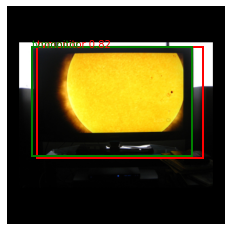

  0%|          | 1/5823 [00:00<14:26,  6.72it/s]

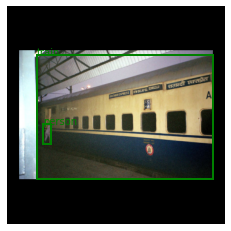

  0%|          | 2/5823 [00:00<14:00,  6.93it/s]

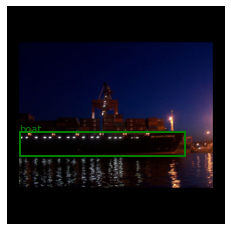

  0%|          | 3/5823 [00:00<12:51,  7.54it/s]

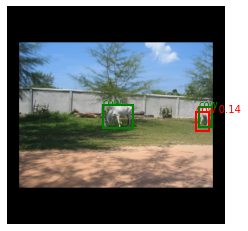

  0%|          | 4/5823 [00:00<13:00,  7.45it/s]

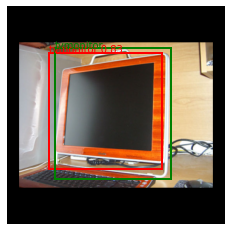

  0%|          | 5/5823 [00:00<12:49,  7.57it/s]

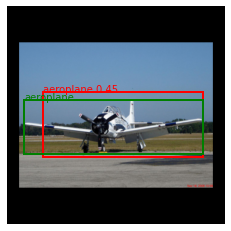

  0%|          | 6/5823 [00:00<12:30,  7.75it/s]

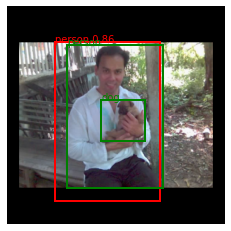

  0%|          | 7/5823 [00:00<12:32,  7.73it/s]

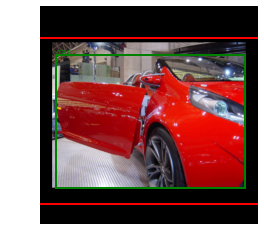

  0%|          | 8/5823 [00:01<12:31,  7.74it/s]

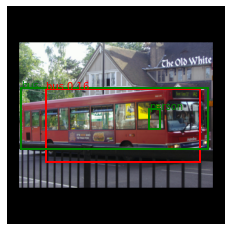

  0%|          | 9/5823 [00:01<13:05,  7.40it/s]

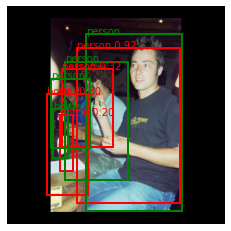

  0%|          | 10/5823 [00:01<14:32,  6.66it/s]

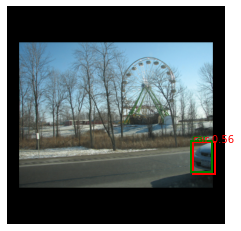

  0%|          | 11/5823 [00:01<14:10,  6.84it/s]

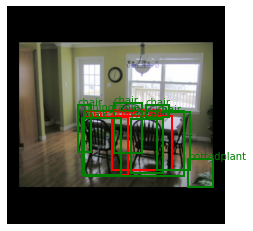

  0%|          | 12/5823 [00:01<14:45,  6.56it/s]

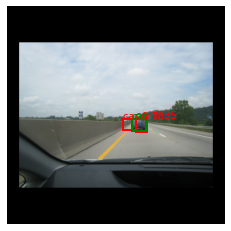

  0%|          | 13/5823 [00:01<14:13,  6.81it/s]

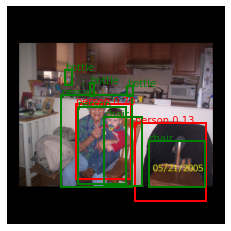

  0%|          | 14/5823 [00:01<14:42,  6.58it/s]

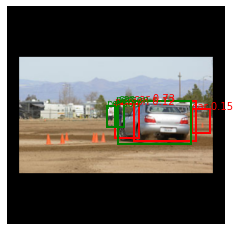

  0%|          | 15/5823 [00:02<14:35,  6.64it/s]

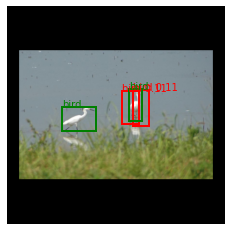

  0%|          | 16/5823 [00:02<14:25,  6.71it/s]

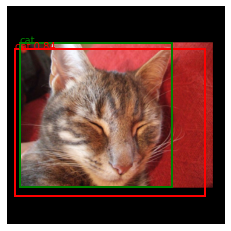

  0%|          | 17/5823 [00:02<13:51,  6.98it/s]

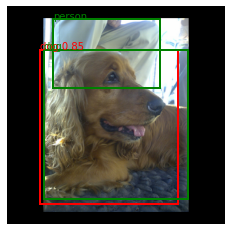

  0%|          | 18/5823 [00:02<13:43,  7.05it/s]

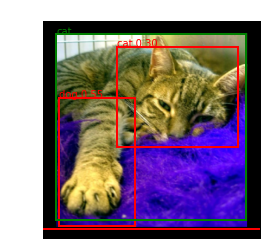

  0%|          | 19/5823 [00:02<13:56,  6.94it/s]

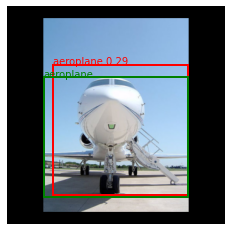

  0%|          | 20/5823 [00:02<13:30,  7.16it/s]

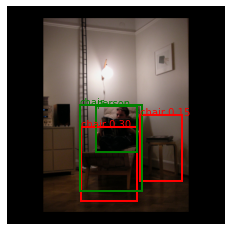

  0%|          | 21/5823 [00:02<13:45,  7.02it/s]

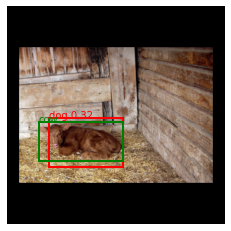

  0%|          | 22/5823 [00:03<14:29,  6.67it/s]

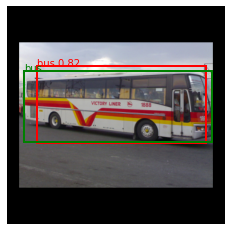

  0%|          | 23/5823 [00:03<14:07,  6.84it/s]

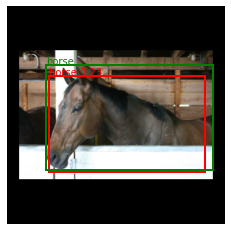

  0%|          | 24/5823 [00:03<13:31,  7.14it/s]

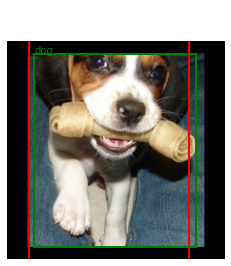

  0%|          | 25/5823 [00:03<13:34,  7.12it/s]

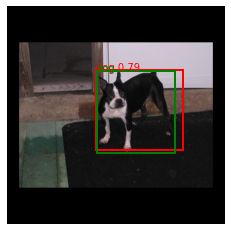

  0%|          | 26/5823 [00:03<13:21,  7.23it/s]

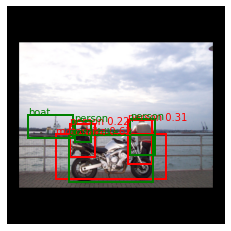

  0%|          | 27/5823 [00:03<13:49,  6.98it/s]

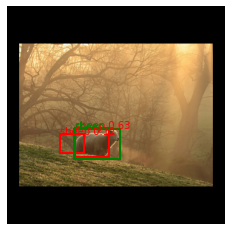

  0%|          | 28/5823 [00:03<13:36,  7.10it/s]

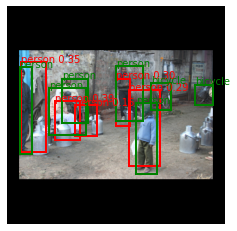

  0%|          | 29/5823 [00:04<14:26,  6.69it/s]

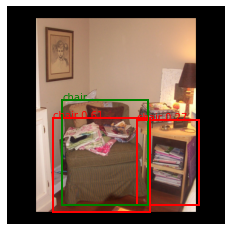

  1%|          | 30/5823 [00:04<14:02,  6.88it/s]

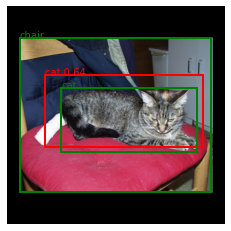

  1%|          | 31/5823 [00:04<13:40,  7.06it/s]

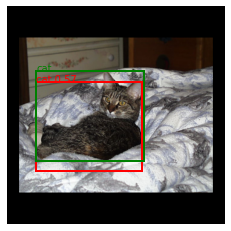

  1%|          | 32/5823 [00:04<13:21,  7.23it/s]

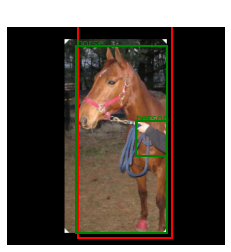

  1%|          | 33/5823 [00:04<12:46,  7.55it/s]

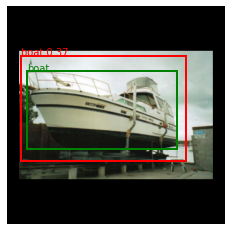

  1%|          | 34/5823 [00:04<12:29,  7.72it/s]

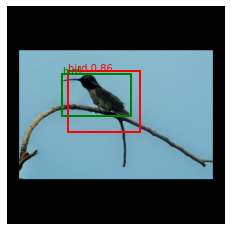

  1%|          | 35/5823 [00:04<13:15,  7.28it/s]

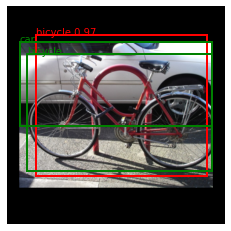

  1%|          | 36/5823 [00:05<13:01,  7.40it/s]

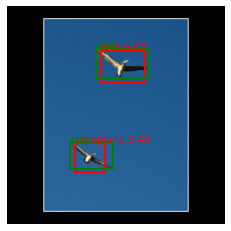

  1%|          | 37/5823 [00:05<13:17,  7.25it/s]

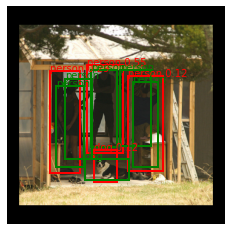

  1%|          | 38/5823 [00:05<14:21,  6.72it/s]

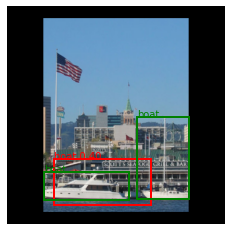

  1%|          | 39/5823 [00:05<13:59,  6.89it/s]

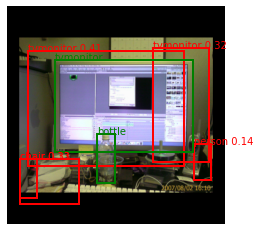

  1%|          | 40/5823 [00:05<14:21,  6.72it/s]

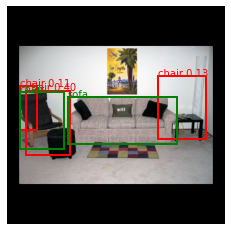

  1%|          | 41/5823 [00:05<14:17,  6.74it/s]

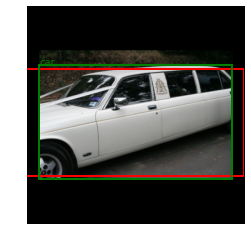

  1%|          | 42/5823 [00:05<13:31,  7.12it/s]

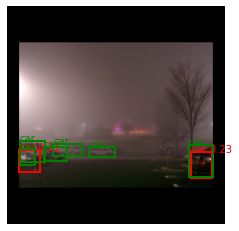

  1%|          | 43/5823 [00:06<14:15,  6.76it/s]

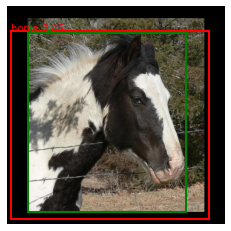

  1%|          | 44/5823 [00:06<13:51,  6.95it/s]

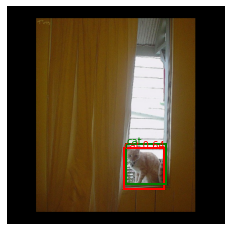

  1%|          | 45/5823 [00:06<13:28,  7.14it/s]

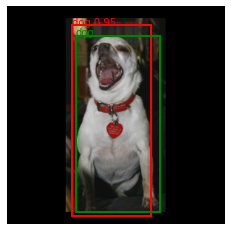

  1%|          | 46/5823 [00:06<13:14,  7.28it/s]

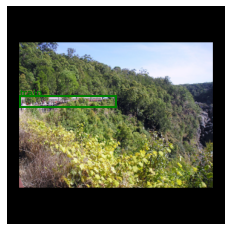

  1%|          | 47/5823 [00:06<13:39,  7.04it/s]

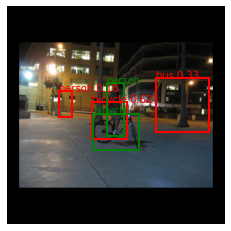

  1%|          | 48/5823 [00:06<14:02,  6.86it/s]

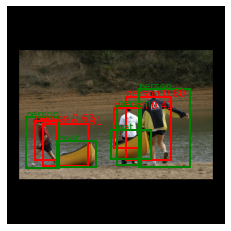

  1%|          | 49/5823 [00:06<14:40,  6.56it/s]

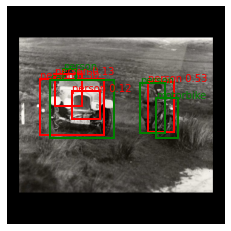

  1%|          | 50/5823 [00:07<13:54,  6.92it/s]


KeyboardInterrupt: 

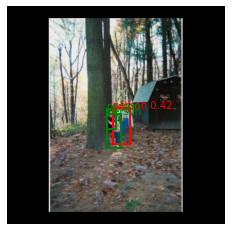

In [5]:
import tqdm
for idx, (input, target) in tqdm.tqdm(enumerate(loader), total=len(loader)):
    
    #input is a 1 x 3 x 320 x 320 image
    output = net(input)
    "output is of a tensor of size 32 x 125 x 10 x 10"
    #output is a 32 x 125 x 10 x 10 tensor
    
    #filter boxes based on confidence score (class_score*confidence)
    output = filter_boxes(output, 0.1)
    
    #filter boxes based on overlap
    output = nms(output, 0.25)
    
    display_result(input, output, target, file_path='yolo_prediction.png')